In [1]:
#Importing Libraries
import os
from tqdm import tqdm
import cv2
import matplotlib.pyplot as plt
import random
import shutil

In [2]:
Dataset_Dir=os.path.join(os.getcwd(),'DATASET')
print("There are total of ",len(os.listdir(Dataset_Dir)),"Classes.")
for classes in os.listdir(Dataset_Dir):
    class_path=os.path.join(Dataset_Dir,classes)
    print("* ",classes,":",len(os.listdir(class_path)),"Files")

There are total of  2 Classes.
*  NORMAL : 1142 Files
*  PCOS : 844 Files


In [3]:
# For resizing all Images and renaming them  in ascending order
output_shape=(300,300)
for classes in os.listdir(Dataset_Dir):
    class_path=os.path.join(Dataset_Dir,classes)
    files=os.listdir(class_path)
    files.sort()
    i=0
    for file in tqdm(files,"Processing :"):
        input_file=os.path.join(class_path,file)
        output_file=os.path.join(class_path,str(i)+"."+file.split('.')[1])
        i=i+1
        img=cv2.imread(input_file,cv2.IMREAD_GRAYSCALE)
        img=cv2.resize(img,output_shape)
        cv2.imwrite(input_file,img)
        os.rename(input_file,output_file)        

Processing :: 100%|██████████████████████████████████████████████████████████████████| 844/844 [00:10<00:00, 81.96it/s]


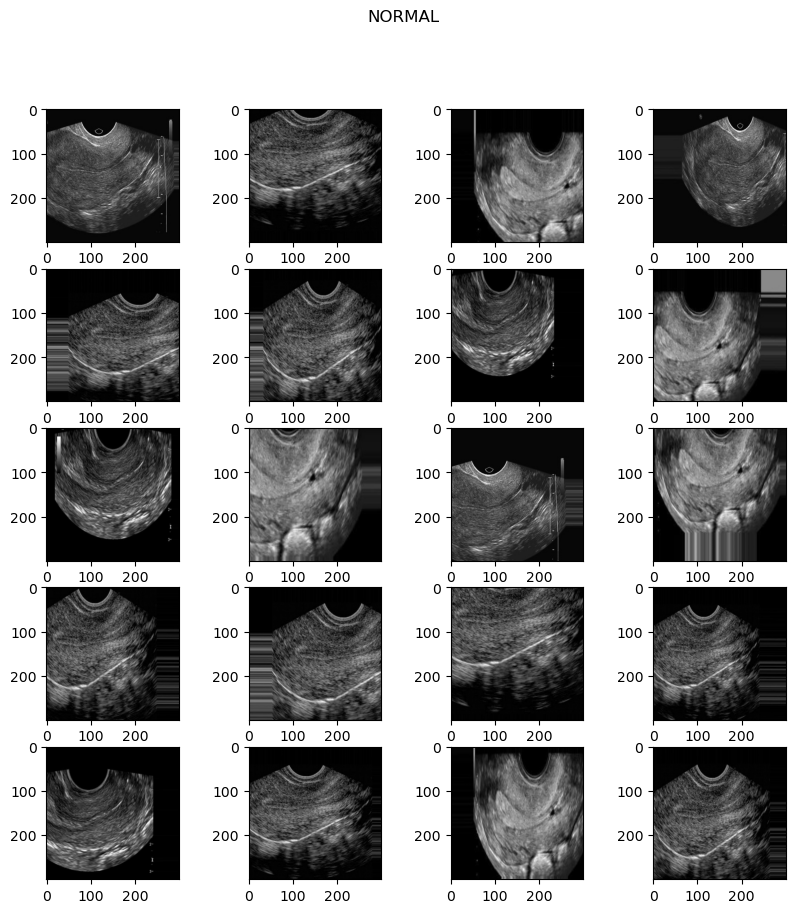

In [4]:
classes=os.listdir(Dataset_Dir)
subfolder=classes[0]
fig=plt.figure(figsize=(10,10))
columns=4
rows=5
files = os.listdir(os.path.join(Dataset_Dir,subfolder))
for i in range(1,columns*rows +1):
    file=random.choice(files)
    img=cv2.imread(os.path.join(Dataset_Dir,subfolder,file)) 
    fig.add_subplot(rows,columns,i)
    plt.imshow(img)
fig.suptitle(subfolder)
plt.show()

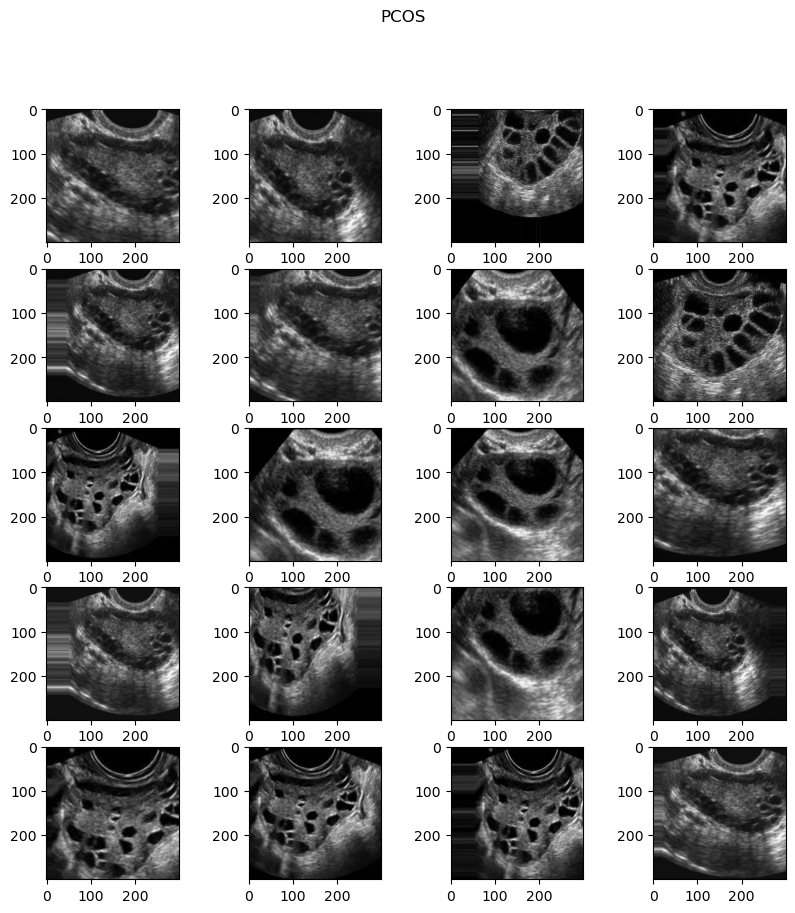

In [5]:
subfolder=classes[1]
fig=plt.figure(figsize=(10,10))
columns=4
rows=5
files = os.listdir(os.path.join(Dataset_Dir,subfolder))
for i in range(1,columns*rows +1):
    file=random.choice(files)
    img=cv2.imread(os.path.join(Dataset_Dir,subfolder,file)) 
    fig.add_subplot(rows,columns,i)
    plt.imshow(img)
fig.suptitle(subfolder)
plt.show()

In [6]:
# Splitting dataset into Test Train
Old_dataset_dir=os.path.join(os.getcwd(),"Old_Dataset")
os.rename(Dataset_Dir,Old_dataset_dir)

In [7]:
split_ratio=0.8

In [8]:
Dataset_Dir=os.path.join(os.getcwd(),"Dataset")
train_Dir=os.path.join(Dataset_Dir,"Train")
test_dir=os.path.join(Dataset_Dir,"Test")

if(not os.path.exists(Dataset_Dir)):
    os.mkdir(Dataset_Dir)
    if(not os.path.exists(train_Dir)):
        os.mkdir(train_Dir)
    if(not os.path.exists(test_dir)):
        os.mkdir(test_dir)
    print("Dataset Directory Created.")
else:
    print("Dataset Directory found.")

Dataset Directory Created.


In [9]:
for classes in os.listdir(Old_dataset_dir):
    train_class_path=os.path.join(train_Dir,classes)
    test_class_path=os.path.join(test_dir,classes)
    if(not os.path.exists(train_class_path)):
        os.mkdir(train_class_path)
    if(not os.path.exists(test_class_path)):
        os.mkdir(test_class_path)
    class_path=os.path.join(Old_dataset_dir,classes)
    files=os.listdir(class_path)
    files.sort()
    train_files=files[0:int(len(files)*split_ratio)]
    test_files=files[int(len(files)*split_ratio):]
    for file in tqdm(train_files,"Copying :"):
        input_path=os.path.join(class_path,file)
        output_path=os.path.join(train_class_path,file)
        shutil.copy(input_path,output_path)
    for file in tqdm(test_files,"Copying :"):
        input_path=os.path.join(class_path,file)
        output_path=os.path.join(test_class_path,file)
        shutil.copy(input_path,output_path)    


Copying :: 100%|████████████████████████████████████████████████████████████████████| 169/169 [00:01<00:00, 122.46it/s]


In [10]:
shutil.rmtree(Old_dataset_dir)